# **Задача №1** - решение

In [65]:
# Импортируем библиотеку для выполнения HTTP-запросов в интернет
import requests
import math

# Читаем текстовый файл по url-ссылке
data = requests.get("https://raw.githubusercontent.com/SkillfactoryDS/Datasets/master/war_peace_processed.txt").text

In [66]:
text = data.split('\n')
text.remove('')

In [67]:
chapters_and_words = {} # Словарь со структурой: {номер главы: список всех слов в главе}
words = [] # список, в который будут добавляться слова конкретной главы
chapter_number = 0

for word in text: 
    words.append(word)
    if word == '[new chapter]':
        words.remove('[new chapter]')
        chapters_and_words[chapter_number] = words
        words = []
        chapter_number += 1

In [68]:
words_frequancy = {} # частотынй словарь со структурой: {номер главы: [[слово, частота встречаеомости в главе], [слово, частота встречаеомости в главе]...]}
frequancy_list = []

for chapter in chapters_and_words:                                            # Берем список слов соответсвующий каждой главе
    unique_words = set(chapters_and_words[chapter])                           # Находим какие слова встречаются в главе (без повторений)
    for word in (unique_words):                                               # Берем слово из множества уникальных слов 
        quantity = chapters_and_words[chapter].count(word)                    # Считаем сколько раз это слово встретилось в главе
        frequancy = round(quantity / len(chapters_and_words[chapter]), 6)     # Находим частототу встречаемости 
        word_and_freq = [word, frequancy]                                     # Добавляем в список слово и его частоту
        frequancy_list.append(word_and_freq)                                  # Заносим данные в список для частотного словаря                                                        

    words_frequancy[chapter] = frequancy_list                       # Добавляем список с парами [слово, частота] в частотный словарь по номеру главы 
    frequancy_list = []                                             # Обнуляем добавляемый список для записи новых пар из следующей главы

In [69]:
def get_word_param(dictionary, chapter, word):                      # Обявление функции поиска частоты по названию словаря, номеру главы и искомому слову
    target_list = dictionary[chapter]                               # Выделяем нужный список по номеру главы
    for target in target_list:                                      # Объявляем цикл для поиска нужной пары (target)
        if word == target[0]: return target[1]                      # Если запрашиваемое слово word совпадает с первым элементом в паре (target[0]), возвращаем частоту его встречаемости (target[1])

    return ('Слово не найдено')                                     # Если поиск не дал результатов, возвращаем "Слово не найдено"

In [70]:
target_word = 'гостья'
target_chapter = 15


print(f"Частота встречаемости слова '{target_word}' из главы № {target_chapter} составляет {get_word_param(words_frequancy, target_chapter, target_word)}")

Частота встречаемости слова 'гостья' из главы № 15 составляет 0.007358


# **Задача №2** - решение

In [71]:
words_collection = set(text)                          # Cоздаем множество элементов текста
words_collection.remove('[new chapter]')              # Убираем из множества разделитель глав '[new chapter]'
count_of_chapters = text.count('[new chapter]') + 1   # Считаем количество глав (+ 1 - потому что в начале первой главы нет '[new chapter]')

In [ ]:
tqdm(iterable, 
     desc="Описание",       # Текст перед полоской
     total=None,            # Можно задать общее число шагов, если iterable не имеет длины
     ncols=80,              # Ширина прогресс-бара в символах
     ascii=True,            # Включает "ASCII стиль" вместо юникода
     bar_format="{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt}",  # Полный кастом формата
     colour="green",        # Цвет прогресс-бара (в Jupyter/VS Code работает)
     leave=True             # Оставлять бар после завершения (иначе исчезнет)

In [86]:
from tqdm import tqdm

document_count = {}  # Словарь: {слово: количество глав с этим словом}

for word in tqdm(words_collection, desc="Считаем главы для каждого слова", ascii=True,bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed}<{remaining}, {rate_fmt}]",colour='green', leave=True):
    if word not in document_count:
        document_count[word] = 0
    for chapter in chapters_and_words:
        if word in chapters_and_words[chapter]:
            document_count[word] += 1

Считаем главы для каждого слова: 100%|##########| 38210/38210 [02:26<00:00, 261.45it/s]


In [73]:
# document_count = {}                                                         # Словарь со структурой: {слово: количество глав с этим словом}  


# for word in words_collection:                                               # Берем слово из множества words_collection
#     if word not in document_count: document_count[word] = 0                 # Добавляем слово в словарь document_count
#     for chapter in chapters_and_words:                                      # Выбираем главу из словаря chapter_and_words по номеру главы (по ключу)
#        if word in chapters_and_words[chapter]: document_count[word] +=1     # Проверяем есть ли это слово (word) в этой главе (списке) и если есть увеличиваем количество. 
                                                                              # Далее цикл переходит следующей главе, а по факту пробежки по всем главам переходит к новому слову (word)
                                                                              # Алгоритм долгий, работает за время О(m * n * k) - m слов во множестве, n глав, k слов в главе

In [74]:
chapters_sets = {chapter: set(words) for chapter, words in chapters_and_words.items()}  # С помощью множеств удалось ускорить программу
document_count = {}

# Сам алгоритм такой же, как в блоке выше, но благодаря множествам работает в разы быстрее
for word in words_collection:
    count = 0
    for chapter in chapters_sets:
        if word in chapters_sets[chapter]:
            count += 1
    document_count[word] = count

In [75]:
document_frequancy = {}                                                      # Словарь со структурой: {слово: доля глав с этим словом}
for word in document_count:                                                  # Объявляем цикл для подсчета
    document_frequancy[word] = document_count.get(word) / count_of_chapters # Находим долю глав в которых встречается слово и заносим в document frequancy

In [76]:
target_word = 'анна'

if target_word not in document_frequancy : print ('Это слово не найдено')
else: print(f"Доля документов, в которых встречается искомое слово '{target_word}' составляет {round(document_frequancy.get(target_word), 5)}")

Доля документов, в которых встречается искомое слово 'анна' составляет 0.18713


# **Задача №3** - решение

In [77]:
tf_idf_dict = {
    chapter: [
        [word, round(freq * math.log(1 / document_frequancy[word]), 6)]
        for word, freq in word_list
        if word in document_frequancy and document_frequancy[word] != 0
    ]
    for chapter, word_list in words_frequancy.items()
}

In [78]:
target_word = 'анна'
target_chapter = 4


print(f"tf_ifd слова '{target_word}' из главы № {target_chapter} составляет {get_word_param(tf_idf_dict, target_chapter, target_word)}")

tf_ifd слова 'анна' из главы № 4 составляет 0.011068


# **Задача №4** - решение

In [79]:
target_chapter = 4

chapter_data = tf_idf_dict.get(target_chapter)                              # Получаем список пар [слово, tf-idf] для нужной главы

sorted_words = sorted(chapter_data, key=lambda x: x[1], reverse=True)       # Сортируем по tf-idf в убывающем порядке

top_3_words = sorted_words[:3]                                              # Берём топ-3

for word, score in top_3_words:                                             # Вывод
    print(f"{word}: {score:.5f}")

павловна: 0.01417
анна: 0.01107
прядильной: 0.00970


In [80]:
import time

# Пример: создание 10 миллионов объектов
start = time.time()
a = [(i, i+1, i+2) for i in range(10_000_000)]
print("Список времени:", time.time() - start)

start = time.time()
b = tuple((i, i+1, i+2) for i in range(10_000_000))
print("Кортеж времени:", time.time() - start)

Список времени: 2.4657814502716064
Кортеж времени: 3.601074695587158


In [85]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.09)  # имитация долгой операции

100%|██████████| 100/100 [00:09<00:00, 11.04it/s]


In [172]:
def best_student(**students):
    return min(students, key=students.get)

In [173]:
print(best_student(Tom=12, Mike=3))

Mike


In [ ]:
#is_palindrom = lambda x: 'yes' if x == x[::-1] else 'no'

In [ ]:
is_palindrom = lambda x: "yes" if x == x[::-1] else "no"

In [175]:
area = lambda x, y: x*y

print(area(10, 5))

50


In [179]:
between_min_max = lambda *args: (min(args) + max(args)) / 2

print(between_min_max(1,2,4,6,7,2))

4.0


In [184]:
def sort_ignore_case(ls):
    sorted_list = sorted(ls)
    return sorted_list

def sort_ignore_case(ls):
    return sorted(ls, key=str.lower)

print(sort_ignore_case(['w', 'r', 'g', 'd', 'x', 'A', 'c']))

['A', 'c', 'd', 'g', 'r', 'w', 'x']


In [ ]:
def exchange(usd=None, rub=None, rate=None):
    args = [usd, rub, rate]
    filled = [arg is not None for arg in args]

    if sum(filled) < 2:
        raise ValueError('Not enough arguments')
    elif sum(filled) > 2:
        raise ValueError('Too many arguments')

    if usd is None:
        return rub / rate
    elif rub is None:
        return usd * rate
    elif rate is None:
        return rub / usd

In [191]:
def get_count_unique_symbols(string):
    string = string.lower()
    string = string.replace(' ', '')
    unique = set(string)
    return(len(unique))

In [192]:
my_str = 'Это простая строка'
print(get_count_unique_symbols(my_str))

9


In [195]:
def get_min_string(s1, s2):
    def get_count_unique_symbols(string):
        string = string.lower()
        string = string.replace(' ', '')
        unique = set(string)
        return(len(unique))
    if get_count_unique_symbols(s1) > get_count_unique_symbols(s2): return s2
    elif get_count_unique_symbols(s1) == get_count_unique_symbols(s2): return (s1, s2)
    else: return s1

In [197]:
print(get_min_string('школа', 'school'))

('школа', 'school')


In [198]:
pi = 3.1416

def calculate_area_circle(r = 0):
    area = pi * r **2
    return area
    
def calculate_area_ellipse(a = 0, b = 0):
    area = pi * a * b
    return area

In [199]:

print(calculate_area_circle(r=5))
## 78.54
print(calculate_area_ellipse(a=3, b=2.5))
## 23.562

print(calculate_area_circle(r=5))
## 78.5
print(calculate_area_ellipse(a=3, b=2.5))
## 23.55


78.53999999999999
23.561999999999998
78.53999999999999
23.561999999999998


In [ ]:
# Словарь с курсами валют (по отношению к рублю)
currencies = {'USD': 74, 'EUR': 88, 'GBP': 98 , 'CHF': 82}
# Общее количество денег на счету, которое нужно конвертировать
money = 100000
# Функция для конвертации валюты, аргумент - наименование валюты
def convert(currencies, money, val):
    return money / currencies[val]

# Вызываем функцию для конвертации валюты
print(convert(currencies, money, 'EUR'))



1136.3636363636363


In [208]:
# Функция для вычисления количества символов (symbol) в строке s
def count_occurrences(s, symbol):
    # Внутренняя функция для предобработки строки s
    def preprocessing_s():
        nonlocal s
        # Удаляем пробелы из строки
        s = s.replace(' ', '')
        # Приводим строку к нижнему регистру
        s = s.lower()
    # Вызываем функцию для предобработки аргумента s
    preprocessing_s()
    # Считаем количество символов symbol в строке s и возвращаем результат
    return s.count(symbol)

count_occurrences('This is simple string', symbol='t')
## 2


2

In [209]:
print(dir(__builtins__))

['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BaseExceptionGroup', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'ExceptionGroup', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'S

In [213]:
def is_leap(year):
    d = year - 2000
    if d % 4 == 0 : return True
    else: return False

print (is_leap(1996))

True


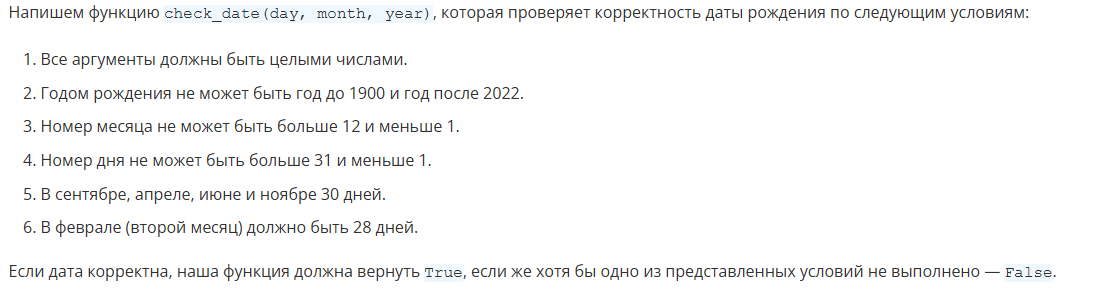

In [224]:
def check_date(day, month, year):
    def is_leap(year):
        d = year - 2000
        if d % 4 == 0 : return True
        else: return False
    # Проверяем день, месяц и год на целочисленность
    if (type(day) is not int) or (type(month) is not int) or (type(year) is not int):
        return False
    # Проверяем год на заданный диапазон
    if (year <= 1900) or (year >= 2022):
        return False
    # Проверяем месяц на заданный диапазон     
    if (month < 1) or (month > 12):
        return False
    # Проверяем день на заданный диапазон  
    if (day < 1) or (day > 31): 
        return False
    # Проверяем апрель, июнь, сентябрь и ноябрь на количество дней
    if (month in [4,6,9,11]) and (day > 30):
        return False
    # Проверяем количество дней в феврале
    if month == 2 and day > 28:
        if is_leap(year) != True: return False
    return True

In [226]:
check_date(29, 2, 2000)

True

In [227]:
# Функция для регистрации пользователей
def register(surname, name, date, middle_name=None, registry=None):
    # Вспомогательная функция для предобработки даты
    def preprocessing_date(date):
        # Разделяем строку по символу точки
        day, month, year = date.split('.')
        # Преобразуем все данные к типу данных int
        day, month, year = int(day), int(month), int(year)
        return day, month, year
    def check_date(day, month, year):
        def is_leap(year):
            d = year - 2000
            if d % 4 == 0 : return True
            else: return False
        # Проверяем день, месяц и год на целочисленность
        if (type(day) is not int) or (type(month) is not int) or (type(year) is not int):
           return False
        # Проверяем год на заданный диапазон
        if (year <= 1900) or (year >= 2022):
            return False
        # Проверяем месяц на заданный диапазон     
        if (month < 1) or (month > 12):
            return False
        # Проверяем день на заданный диапазон  
        if (day < 1) or (day > 31): 
            return False
        # Проверяем апрель, июнь, сентябрь и ноябрь на количество дней
        if (month in [4,6,9,11]) and (day > 30):
            return False
        # Проверяем количество дней в феврале
        if month == 2 and day > 28:
            if is_leap(year) != True: return False
        return True
    # Если список не был передан — создаём пустой список
    if registry is None:
        registry = list()
    # Разделяем дату на составляющие
    day, month, year = preprocessing_date(date)
    # Добавляем данные в список
    if check_date(day, month, year) != True:
        raise ValueError("Invalid Date!")
    else: 
        registry.append((surname, name, middle_name, day, month, year))
        return registry

In [ ]:
def check_exist_triangle(a, b, c):
    if a + b > c and a + c > b and b + c > a: return True
    else: return False

In [228]:
def triangle(p1, p2, p3):
    # Функция для вычисления сторон треугольника
    # По умолчанию параметры функции берутся из объемлющей области видимости
    def sides(p1, p2, p3):
        # Распаковываем кортежи для удобства, “;” означает новую строку кода
        x1, y1 = p1; x2, y2 = p2; x3, y3 = p3
        # Вычисляем стороны по теореме Пифагора
        a = ((x2 - x1) ** 2 + (y2 - y1)** 2) ** 0.5
        b = ((x3 - x1) ** 2 + (y3 - y1)** 2) ** 0.5
        c = ((x3 - x2) ** 2 + (y3 - y2)** 2) ** 0.5
    
        def check_exist_triangle(a, b, c):
            if a + b > c and a + c > b and b + c > a: return True
            else: return False
        
        if check_exist_triangle(a, b, c) == True: return a, b, c
        else: raise ValueError("Треугольник не существует")

    # Функция для вычисления периметра треугольника
    def calculate_perimeter_triangle(a, b, c):
        # Периметр — сумма всех сторон треугольника
        perimeter = a + b + c
        return perimeter

    # Функция для вычисления площади треугольника
    def calculate_area_triangle(a, b, c):
        # Вычисляем полупериметр 
        # Значение perimeter берётся из объемлющей области видимости
        p = perimeter / 2
        # Вычисляем площадь по формуле Герона
        area = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return area
    a, b, c = sides(p1, p2, p3)
    perimeter = calculate_perimeter_triangle(a, b, c)
    area = calculate_area_triangle(a, b, c)
    result = {'a': a, 'b': b, 'c': c, 'perimeter': perimeter, 'area': area}
    return result

In [229]:
def radius(p1 = (0, 0), p2 = (0,0)):
    x1, y1 = p1
    x2, y2 = p2

    l1 = y2- y1
    l2 = x2 - x1
    rad = (l1**2 + l2**2)**0.5
    return rad

In [232]:
def circle (p1 = (0, 0), p2 = (0,0)):
    circle_dict = {}
    def radius(p1 = (0, 0), p2 = (0,0)):
        x1, y1 = p1
        x2, y2 = p2

        l1 = y2- y1
        l2 = x2 - x1
        rad = (l1**2 + l2**2)**0.5
        return rad
    
    def calculate_circumference(radd):
        return radd * 2 * pi
    
    def calculate_area_circle(radd):
        return pi * radd**2
    
    circle_dict['radius'] = round(radius(p1, p2), 3)
    circle_dict['circumference'] = round(calculate_circumference(radius(p1, p2)), 3)
    circle_dict['area'] = round(calculate_area_circle(radius(p1, p2)), 3)

    return circle_dict
    


In [233]:
print(circle(p1 = (2, 4), p2 = (8, 14)))

{'radius': 11.662, 'circumference': 73.274, 'area': 427.258}


In [235]:
pip install gradio_client

   ---------------------------------------- 0.0/322.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/322.9 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/322.9 kB 487.6 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/322.9 kB 744.7 kB/s eta 0:00:01
   -------------------- ----------------- 174.1/322.9 kB 952.6 kB/s eta 0:00:01
   ----------------------------- ---------- 235.5/322.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 322.9/322.9 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/484.3 kB ? eta -:--:--
   -------------------------- ------------ 327.7/484.3 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------  481.3/484.3 kB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 484.3/484.3 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/176.8 kB ? eta -:--:--
   --------------------------------------- 176.8/176.8 kB 10.4 MB/s eta 0:0

In [236]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/lambda"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
()


In [237]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/close_header"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
()


In [238]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/apply_state_change"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
()


In [239]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/toggle_thinking"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
()


In [240]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/update_browser_state"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
{'value': {'conversations': [], 'conversation_contexts': {}}, '__type__': 'update'}


In [243]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/new_chat"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔
({'__type__': 'update'}, {'__type__': 'update'})


In [ ]:
from gradio_client import Client

client = Client("Qwen/Qwen3-Demo")
result = client.predict(
		api_name="/select_conversation"
)
print(result)

Loaded as API: https://qwen-qwen3-demo.hf.space ✔


AppError: The upstream Gradio app has raised an exception but has not enabled verbose error reporting. To enable, set show_error=True in launch().

: 